In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

/home/sannhtet/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [7]:
genes = ['gene' + str(i) for i in range(1,101)]
wt = ['wt' + str(i) for i in range(1,6)] # Wild type
ko = ['ko' + str(i) for i in range(1,6)] # Knock out

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

for i in range(len(data.index)):
    data.iloc[i,0:5] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.iloc[i,5:] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    
print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  451  470  505  507  506  123  127  120  118  108
gene2  119  127  118  103   96  394  409  369  418  354
gene3  312  288  304  323  313  854  845  834  812  871
gene4  351  380  362  370  409  746  703  773  772  722
gene5  360  364  397  365  353  791  807  815  795  878
(100, 10)


In [10]:
scaled_data = preprocessing.scale(data.T)

In [12]:
model = PCA()
model.fit(scaled_data)
pca_data = model.transform(scaled_data)

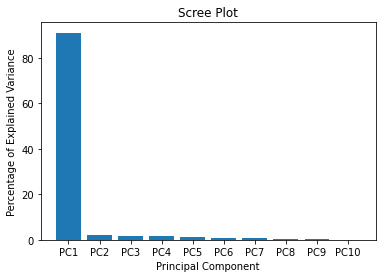

In [13]:
per_var = np.round(model.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

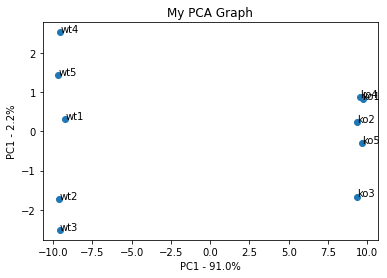

In [19]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC1 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

In [20]:
loading_scores = pd.Series(model.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene93   -0.104777
gene11    0.104769
gene36   -0.104765
gene95    0.104764
gene85   -0.104755
gene14   -0.104726
gene24    0.104706
gene82   -0.104702
gene70   -0.104700
gene52   -0.104689
dtype: float64
